In [1]:
import numpy as np
import pandas as pd
import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df, train, val, test = w.wrangle_data()

Opening data from local file.


# Univarite Analysis

In [3]:
explore_cols = df.columns

In [18]:
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [19]:
train.columns

Index(['date', 'year', 'month', 'customer_age', 'customer_gender', 'country',
       'state', 'product_category', 'sub_category', 'quantity', 'unit_cost',
       'unit_price', 'cost', 'revenue', 'total_price'],
      dtype='object')

Univariate Feature analysis of feature date:


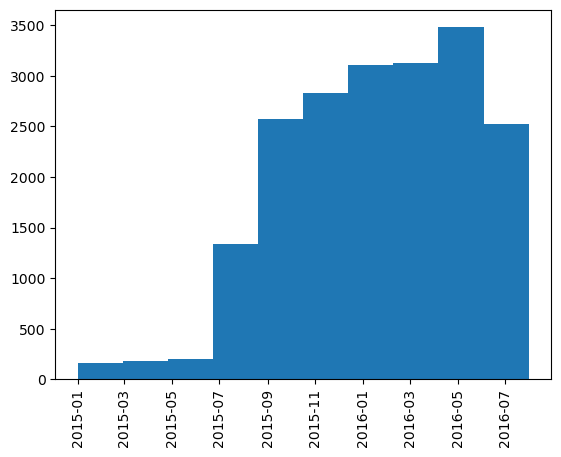

TypeError: Horizontal orientation requires numeric `x` variable.

In [20]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=train, x=col)
        plt.xticks(rotation=90)
        plt.show()
        print(
            pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
    else:
        print(f'Univariate Feature analysis of feature {col}:')
        plt.hist(train[col])
        plt.xticks(rotation=90)
        plt.show()
        sns.boxplot(data=train, x=col)
        plt.xticks(rotation=90)
        plt.show()
        train[col].describe()
    print('------------------------------')
    print('------------------------------')

### Findings: 
- May and June are the highest selling months, followed by December and April
- 50% of our customer are aged 28-44
- Gender is about equal among customers
- USA has ordered over 2x as many times as the other countries
- California, Washington and Oregon have the highest number of sales
- Accessories are sold almost 3x as much as other categories
- 'Tires and Tubes', 'Bottles and Cages' and Helmets are the highest selling sub categories

## Bivariate

In [16]:
def get_corr_heatmap(train):
    '''
    This function will display a heatmap of the potential correlations between variables in 
    our dataset
    '''
    # get the correlation values
    corr_matrix = train.corr()
    # create a plot
    plt.figure(figsize=(10,10))
    # plot a heatmap of the correlations
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    # add a title
    plt.title('Heat Map of Correlation')
    # display the plot
    plt.show()

In [17]:
def get_pairplot(df):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    if len(df) > 500:
        sample = df.sample(500)
    else:
        sample = df
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    
    plt.show()